In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# pub_2306=pd.read_csv('../data/서울특별시 공공자전거 대여이력 정보_2306.csv',encoding='cp949')
# pub_2306.head()

In [14]:
# pub_2306.tail()

In [15]:
# pub_2306.describe()

In [16]:
# pub_2306.info()

In [17]:
# pub_2306.replace(r'\N', np.nan)

In [18]:
# pub_2307=pd.read_csv('../data/서울특별시 공공자전거 대여이력 정보_2307.csv',encoding='cp949')
# pub_2307.replace(r'\N', np.nan)

In [19]:
# pub_2306.columns

In [20]:
# pub_2307.columns

In [21]:
# pub_2308=pd.read_csv('../data/서울특별시 공공자전거 대여이력 정보_2308.csv',encoding='cp949')
# pub_2308.replace(r'\N', np.nan)

In [22]:
songpa=pd.read_csv('../data/반납추가.csv')
songpa.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_1198/1013668571.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  songpa=pd.read_csv('../data/반납추가.csv')


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구


In [23]:
songpa['대여 대여소번호'].info()
print()
songpa['반납대여소번호'].info()

KeyError: '대여소번호'

In [ ]:
# songpa.replace(r'\N', np.nan)
songpa['반납대여소번호'] = songpa['반납대여소번호'].replace('\\N', np.nan)

In [ ]:
songpa['반납대여소번호'] = songpa['반납대여소번호'].fillna(0)

In [ ]:
songpa['반납대여소번호'] = songpa['반납대여소번호'].astype(int)

In [ ]:
songpa.drop(
    ['대여거치대','반납거치대','이용시간(분)','이용거리(M)'],
    axis=1,
    inplace=True
)
songpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523551 entries, 0 to 4523550
Data columns (total 14 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   자전거번호    object
 1   대여일시     object
 2   대여소번호    int64 
 3   대여소명     object
 4   반납일시     object
 5   반납대여소번호  int64 
 6   반납대여소명   object
 7   생년       object
 8   성별       object
 9   이용자종류    object
 10  대여대여소ID  object
 11  반납대여소ID  object
 12  자전거구분    object
 13  자치구      object
dtypes: int64(2), object(12)
memory usage: 483.2+ MB


In [ ]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

<Axes: >

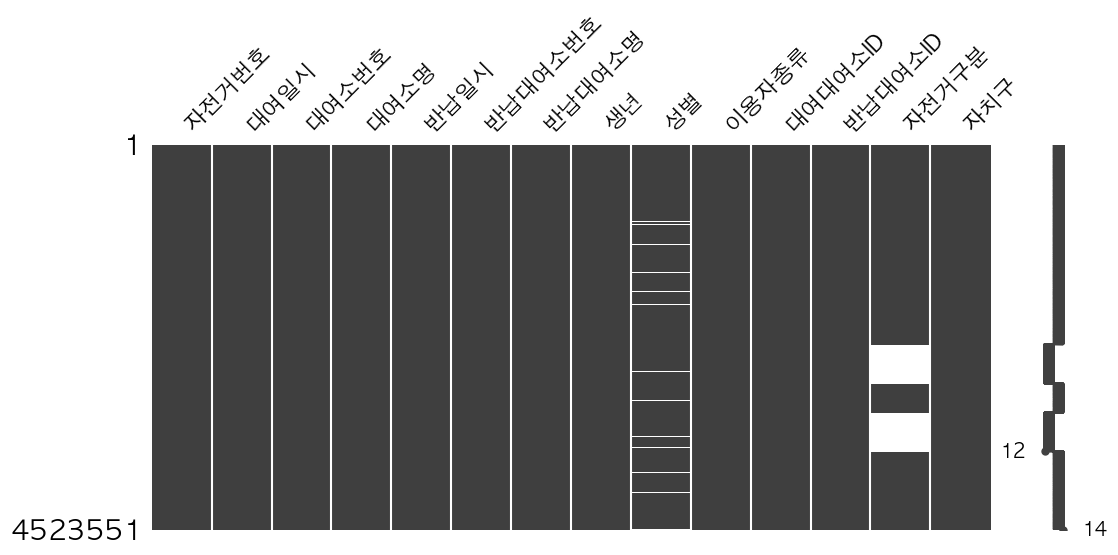

In [ ]:
import missingno as msno 

msno.matrix(songpa, figsize=(12, 5))

In [ ]:
songpa['date']=pd.to_datetime(songpa['대여일시'])

In [ ]:
songpa.head()

,자전거번호,대여일시,대여소번호,대여소명,반납일시,반납대여소번호,반납대여소명,생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,date
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637,아시아지하보도 14번 출구,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,2024-04-01 00:02:22
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486,홈플러스 잠실점,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,2024-04-01 00:03:25
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893,문정법조단지12,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,2024-04-01 00:01:12
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621,한성백제역 2번 출구,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,2024-04-01 00:05:20
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490,송파파인타운 10단지 1005동,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,2024-04-01 00:00:53


In [ ]:
songpa.drop(
    '대여일시',
    axis=1,
    inplace=True
)

In [ ]:
time_03=pd.read_csv('../data/23.03.csv', encoding='cp949')
time_03.head()

,일시,대여소번호,대여소명,시간대,거치대수량
0,2023-03-01,102,102. 망원역 1번출구 앞,0,22
1,2023-03-01,102,102. 망원역 1번출구 앞,1,19
2,2023-03-01,102,102. 망원역 1번출구 앞,2,23
3,2023-03-01,102,102. 망원역 1번출구 앞,3,23
4,2023-03-01,102,102. 망원역 1번출구 앞,4,25


In [ ]:
songpa['time']=songpa['date'].dt.hour
songpa.head()

,자전거번호,대여소번호,대여소명,반납일시,반납대여소번호,반납대여소명,생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,date,time
0,SPB-62435,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637,아시아지하보도 14번 출구,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,2024-04-01 00:02:22,0
1,SPB-58734,1295,잠실역 8번출구,2024-04-01 00:05:04,4486,홈플러스 잠실점,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,2024-04-01 00:03:25,0
2,SPB-43679,4880,송파청소년센터,2024-04-01 00:05:08,4893,문정법조단지12,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,2024-04-01 00:01:12,0
3,SPB-31592,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621,한성백제역 2번 출구,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,2024-04-01 00:05:20,0
4,SPB-69307,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490,송파파인타운 10단지 1005동,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,2024-04-01 00:00:53,0


In [ ]:
songpa['date']=songpa['date'].dt.date
songpa.head()

,자전거번호,대여소번호,대여소명,반납일시,반납대여소번호,반납대여소명,생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,date,time
0,SPB-62435,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637,아시아지하보도 14번 출구,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,2024-04-01,0
1,SPB-58734,1295,잠실역 8번출구,2024-04-01 00:05:04,4486,홈플러스 잠실점,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,2024-04-01,0
2,SPB-43679,4880,송파청소년센터,2024-04-01 00:05:08,4893,문정법조단지12,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,2024-04-01,0
3,SPB-31592,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621,한성백제역 2번 출구,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,2024-04-01,0
4,SPB-69307,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490,송파파인타운 10단지 1005동,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,2024-04-01,0


In [ ]:
# songpa['자전거구분']=[0 if x=='일반자전거' else 1 for x in songpa['자전거구분']]
# songpa.head()

In [ ]:
songpa_yh=pd.read_csv('../data/송파구_따릉이_y.csv')
songpa_yh.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_9266/3753224747.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  songpa_yh=pd.read_csv('../data/송파구_따릉이_y.csv')


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,자치구,대여시간,반납시간,시간,대여건수,대여년도,대여월,대여일,요일,휴일여부
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,02637,아시아지하보도 14번 출구,0,0,...,송파구,0,0,0,85517,2024,4,1,0,0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,04486,홈플러스 잠실점,0,1,...,송파구,0,0,0,85517,2024,4,1,0,0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,04893,문정법조단지12,0,3,...,송파구,0,0,0,85517,2024,4,1,0,0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,02621,한성백제역 2번 출구,0,0,...,송파구,0,0,0,85517,2024,4,1,0,0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,04490,송파파인타운 10단지 1005동,0,8,...,송파구,0,0,0,85517,2024,4,1,0,0


In [ ]:
songpa_yh.columns

Index(['자전거번호', '대여일시', '대여소번호', '대여소명', '대여거치대', '반납일시', '반납대여소번호', '반납대여소명',
       '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID', '자전거구분', '자치구', '대여시간', '반납시간', '시간', '대여건수', '대여년도', '대여월',
       '대여일', '요일', '휴일여부'],
      dtype='object')

In [ ]:
songpa['자전거구분'].unique()

array(['일반자전거', '새싹자전거', nan], dtype=object)

In [ ]:
songpa_yh['자전거구분'].isnull().sum()
# songpa_yh.loc[songpa_yh['자전거구분']=='일반자전거','자전거구분'].count()
# songpa_yh.loc[songpa_yh['자전거구분']=='새싹자전거','자전거구분'].count()

914706

In [ ]:
songpa['생년'] = songpa['생년'].replace(['\\N', 'NaN', np.nan], 0).astype(int)

In [ ]:
songpa_yh['생년'].unique()

array(['1974', '2004', '1997', '2003', '2000', '1989', '2008', '1973',
       '1986', '2001', '1998', '1975', '1994', '2002', '1990', '1992',
       '1985', '1993', '1991', '1963', '1972', '1999', '2005', '1996',
       '1983', '1976', '1965', '1962', '1982', '1979', '\\N', '1966',
       '1978', '1984', '1970', '1964', '1995', '2007', '1987', '1980',
       '1901', '1981', '2095', '1960', '1988', '1956', '1977', '1961',
       '1968', '1967', '1969', '1958', '1971', '1952', '1959', '1957',
       '2010', '1954', '2009', '2006', '2063', '1955', '1933', '1950',
       '2094', '2019', '2018', '1945', '2098', '1943', '1947', '2090',
       '2020', '2076', '1936', '1944', '1941', '1942', '2049', '1940',
       '1951', '1949', '1946', '1953', '2074', '1904', '2096', '2086',
       '2083', '1900', '2091', '2084', '2079', '2082', '2081', '2021',
       '1906', '1938', '1916', '2069', '2088', '1912', '2062', '2011',
       '2016', '2097', '2071', '2066', '1935', '1948', '1903', '1905',
       

In [ ]:
songpa['생년'].unique()

array([1974, 2004, 1997, 2003, 2000, 1989, 2008, 1973, 1986, 2001, 1998,
       1975, 1994, 2002, 1990, 1992, 1985, 1993, 1991, 1963, 1972, 1999,
       2005, 1996, 1983, 1976, 1965, 1962, 1982, 1979,    0, 1966, 1978,
       1984, 1970, 1964, 1995, 2007, 1987, 1980, 1901, 1981, 2095, 1960,
       1988, 1956, 1977, 1961, 1968, 1967, 1969, 1958, 1971, 1952, 1959,
       1957, 2010, 1954, 2009, 2006, 2063, 1955, 1933, 1950, 2094, 2019,
       2018, 1945, 2098, 1943, 1947, 2090, 2020, 2076, 1936, 1944, 1941,
       1942, 2049, 1940, 1951, 1949, 1946, 1953, 2074, 1904, 2096, 2086,
       2083, 1900, 2091, 2084, 2079, 2082, 2081, 2021, 1906, 1938, 1916,
       2069, 2088, 1912, 2062, 2011, 2016, 2097, 2071, 2066, 1935, 1948,
       1903, 1905, 1932, 2093, 1927, 2014, 1931, 1907, 2092, 2073, 1939,
       1925, 1909, 2017, 2078, 1908, 2087, 2064, 2099, 1921, 1934, 1902,
       2060, 1937, 2077, 2075, 2070, 2059, 1910, 2089, 1914, 2012, 1930,
       2057, 1919, 2015, 2080, 2072, 1926, 2068, 20

In [ ]:
songpa.loc[(songpa['생년']!=0)&(songpa['자전거구분']=='새싹자전거'),'생년'].mean(numeric_only=True)

1987.3503790516743

In [ ]:
# songpa['자전거구분']=['일반자전거' if x>= else 1 for x in songpa['자전거구분']]

In [ ]:
air_2305=pd.read_excel('../data/air_pollution/2023년 5월.xlsx')
air_2305=air_2305[air_2305['측정소명']=='송파구']
air_2305.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
23064,서울 송파구,도시대기,111273,송파구,2023050101,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236
23065,서울 송파구,도시대기,111273,송파구,2023050102,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236
23066,서울 송파구,도시대기,111273,송파구,2023050103,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236
23067,서울 송파구,도시대기,111273,송파구,2023050104,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236
23068,서울 송파구,도시대기,111273,송파구,2023050105,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236


In [ ]:
air_2306=pd.read_excel('../data/air_pollution/2023년 6월.xlsx')
air_2306=air_2306[air_2306['측정소명']=='송파구']
air_2306.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
22320,서울 송파구,도시대기,111273,송파구,2023060101,0.0027,0.43,0.0312,0.0215,40.0,20.0,서울 송파구 백제고분로 236
22321,서울 송파구,도시대기,111273,송파구,2023060102,0.0024,0.43,0.0223,0.0251,39.0,24.0,서울 송파구 백제고분로 236
22322,서울 송파구,도시대기,111273,송파구,2023060103,0.0024,0.43,0.0201,0.0254,40.0,27.0,서울 송파구 백제고분로 236
22323,서울 송파구,도시대기,111273,송파구,2023060104,0.0025,0.42,0.0209,0.0225,39.0,24.0,서울 송파구 백제고분로 236
22324,서울 송파구,도시대기,111273,송파구,2023060105,0.0027,0.44,0.0178,0.0244,39.0,21.0,서울 송파구 백제고분로 236


In [ ]:
air_pol=pd.concat([air_2305, air_2306])

In [ ]:
air_2307=pd.read_excel('../data/air_pollution/2023년 7월.xlsx')
air_2307=air_2307[air_2307['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2307])
air_pol.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
23064,서울 송파구,도시대기,111273,송파구,2023050101,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236
23065,서울 송파구,도시대기,111273,송파구,2023050102,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236
23066,서울 송파구,도시대기,111273,송파구,2023050103,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236
23067,서울 송파구,도시대기,111273,송파구,2023050104,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236
23068,서울 송파구,도시대기,111273,송파구,2023050105,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236


In [ ]:
air_2308=pd.read_excel('../data/air_pollution/2023년 8월.xlsx')
air_2308=air_2308[air_2308['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2308])

In [ ]:
air_2309=pd.read_excel('../data/air_pollution/2023년 9월.xlsx')
air_2309=air_2309[air_2309['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2309])

In [ ]:
air_2310=pd.read_excel('../data/air_pollution/2023년 10월.xlsx')
air_2310=air_2310[air_2310['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2310])

In [ ]:
air_2311=pd.read_excel('../data/air_pollution/2023년 11월.xlsx')
air_2311=air_2311[air_2311['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2311])

In [ ]:
air_2312=pd.read_excel('../data/air_pollution/2023년 12월.xlsx')
air_2312=air_2312[air_2312['측정소명']=='송파구']
air_pol=pd.concat([air_pol, air_2312])

In [ ]:
for i in range(1,6):
    air_240i=pd.read_excel(f'../data/air_pollution/2024년 {i}월.xlsx')
    air_240i=air_240i[air_240i['측정소명']=='송파구']
    air_pol=pd.concat([air_pol, air_240i])

In [ ]:
air_pol.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
23803,서울 송파구,도시대기,111273,송파구,2024053120,0.0022,0.24,0.0494,0.0143,17.0,4.0,서울 송파구 백제고분로 236
23804,서울 송파구,도시대기,111273,송파구,2024053121,0.0021,0.22,0.0503,0.0114,10.0,1.0,서울 송파구 백제고분로 236
23805,서울 송파구,도시대기,111273,송파구,2024053122,0.0020,0.22,0.0507,0.0091,13.0,4.0,서울 송파구 백제고분로 236
23806,서울 송파구,도시대기,111273,송파구,2024053123,0.0023,0.26,0.0487,0.0092,16.0,11.0,서울 송파구 백제고분로 236
23807,서울 송파구,도시대기,111273,송파구,2024053124,0.0022,0.29,0.0465,0.0081,23.0,9.0,서울 송파구 백제고분로 236


In [ ]:
air_pol.info()
air_pol.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9528 entries, 23064 to 23807
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      9528 non-null   object 
 1   망       9528 non-null   object 
 2   측정소코드   9528 non-null   int64  
 3   측정소명    9528 non-null   object 
 4   측정일시    9528 non-null   int64  
 5   SO2     9293 non-null   float64
 6   CO      9434 non-null   float64
 7   O3      9434 non-null   float64
 8   NO2     9431 non-null   float64
 9   PM10    9363 non-null   float64
 10  PM25    9385 non-null   float64
 11  주소      9528 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 967.7+ KB


,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,9528.0,9.528000e+03,9293.000000,9434.000000,9434.000000,9431.000000,9363.000000,9385.000000
mean,111273.0,2.023448e+09,0.002522,0.424299,0.032103,0.022286,34.357257,17.858817
std,0.0,4.598517e+05,0.000571,0.136831,0.021973,0.012394,26.363416,11.593811
min,111273.0,2.023050e+09,0.001100,0.200000,0.001300,0.003600,3.000000,1.000000
25%,111273.0,2.023081e+09,0.002200,0.330000,0.016000,0.012700,20.000000,9.000000
50%,111273.0,2.023112e+09,0.002400,0.390000,0.029400,0.019200,30.000000,16.000000
75%,111273.0,2.024022e+09,0.002800,0.490000,0.043700,0.029100,42.000000,24.000000
max,111273.0,2.024053e+09,0.007500,1.200000,0.160500,0.101500,487.000000,89.000000


In [ ]:
air_pol.head(30)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
23064,서울 송파구,도시대기,111273,송파구,2023050101,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236
23065,서울 송파구,도시대기,111273,송파구,2023050102,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236
23066,서울 송파구,도시대기,111273,송파구,2023050103,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236
23067,서울 송파구,도시대기,111273,송파구,2023050104,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236
23068,서울 송파구,도시대기,111273,송파구,2023050105,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236
23069,서울 송파구,도시대기,111273,송파구,2023050106,0.0019,0.39,0.0265,0.0165,54.0,22.0,서울 송파구 백제고분로 236
23070,서울 송파구,도시대기,111273,송파구,2023050107,0.0020,0.38,0.0266,0.0190,51.0,22.0,서울 송파구 백제고분로 236
23071,서울 송파구,도시대기,111273,송파구,2023050108,0.0022,0.38,0.0315,0.0162,49.0,21.0,서울 송파구 백제고분로 236
23072,서울 송파구,도시대기,111273,송파구,2023050109,0.0025,0.38,0.0344,0.0170,50.0,27.0,서울 송파구 백제고분로 236
23073,서울 송파구,도시대기,111273,송파구,2023050110,0.0023,0.40,0.0392,0.0182,52.0,19.0,서울 송파구 백제고분로 236


In [ ]:
air_pol['측정일시'] = air_pol['측정일시'].astype(str)

In [ ]:
# air_pol['date'] = pd.to_datetime(air_pol['측정일시'].str[:8], format='%Y%m%d')
# air_pol['날짜'] = air_pol['date'].dt.strftime('%Y%m%d')
air_pol['시간'] = air_pol['측정일시'].str[8:]
air_pol.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,날짜,시간
23064,서울 송파구,도시대기,111273,송파구,2023050101,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236,2023-05-01,20230501,01
23065,서울 송파구,도시대기,111273,송파구,2023050102,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236,2023-05-01,20230501,02
23066,서울 송파구,도시대기,111273,송파구,2023050103,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236,2023-05-01,20230501,03
23067,서울 송파구,도시대기,111273,송파구,2023050104,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,04
23068,서울 송파구,도시대기,111273,송파구,2023050105,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,05


In [ ]:
air_pol.head(30)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,날짜,시간
23064,서울 송파구,도시대기,111273,송파구,2023050101,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236,2023-05-01,20230501,01
23065,서울 송파구,도시대기,111273,송파구,2023050102,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236,2023-05-01,20230501,02
23066,서울 송파구,도시대기,111273,송파구,2023050103,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236,2023-05-01,20230501,03
23067,서울 송파구,도시대기,111273,송파구,2023050104,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,04
23068,서울 송파구,도시대기,111273,송파구,2023050105,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,05
23069,서울 송파구,도시대기,111273,송파구,2023050106,0.0019,0.39,0.0265,0.0165,54.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,06
23070,서울 송파구,도시대기,111273,송파구,2023050107,0.0020,0.38,0.0266,0.0190,51.0,22.0,서울 송파구 백제고분로 236,2023-05-01,20230501,07
23071,서울 송파구,도시대기,111273,송파구,2023050108,0.0022,0.38,0.0315,0.0162,49.0,21.0,서울 송파구 백제고분로 236,2023-05-01,20230501,08
23072,서울 송파구,도시대기,111273,송파구,2023050109,0.0025,0.38,0.0344,0.0170,50.0,27.0,서울 송파구 백제고분로 236,2023-05-01,20230501,09
23073,서울 송파구,도시대기,111273,송파구,2023050110,0.0023,0.40,0.0392,0.0182,52.0,19.0,서울 송파구 백제고분로 236,2023-05-01,20230501,10


In [ ]:
air_pol.drop(
    ['측정일시','날짜'],
    axis=1,
    inplace=True
)
air_pol.head()

,지역,망,측정소코드,측정소명,SO2,CO,O3,NO2,PM10,PM25,주소,date,시간
23064,서울 송파구,도시대기,111273,송파구,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236,2023-05-01,01
23065,서울 송파구,도시대기,111273,송파구,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236,2023-05-01,02
23066,서울 송파구,도시대기,111273,송파구,0.0020,0.40,0.0418,0.0123,64.0,28.0,서울 송파구 백제고분로 236,2023-05-01,03
23067,서울 송파구,도시대기,111273,송파구,0.0020,0.40,0.0331,0.0152,58.0,22.0,서울 송파구 백제고분로 236,2023-05-01,04
23068,서울 송파구,도시대기,111273,송파구,0.0021,0.39,0.0334,0.0123,56.0,22.0,서울 송파구 백제고분로 236,2023-05-01,05


In [ ]:
# air_pol.to_csv('../data/airpollution_merge.csv',index=False)

In [ ]:
songpa.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구
5,SPB-51796,2024-04-01 00:02:17,1274,영파여고 앞,0,2024-04-01 00:09:06,1029.0,성내어울터,0,6,571.17,1989,\N,내국인,ST-1092,ST-1046,일반자전거,송파구,강동구
6,SPB-45531,2024-04-01 00:02:19,1208,풍납현대아파트쉼터,0,2024-04-01 00:09:08,1084.0,윤선생빌딩(JYP사옥),0,6,1123.74,2008,M,내국인,ST-541,ST-1687,일반자전거,송파구,강동구
7,SPB-69398,2024-04-01 00:01:25,1244,문정 법조단지8,0,2024-04-01 00:09:44,2408.0,강남한양수자인아파트,0,8,936.10,2000,\N,내국인,ST-904,ST-1578,일반자전거,송파구,강남구
8,SPB-66109,2024-04-01 00:00:59,2604,풍납토성 서성벽터A,0,2024-04-01 00:10:44,1012.0,천호역효성해링턴타워 앞,0,9,1550.00,1973,\N,내국인,ST-1627,ST-496,일반자전거,송파구,강동구
9,SPB-33083,2024-04-01 00:01:11,2377,수서역 5번출구,0,2024-04-01 00:11:22,4480.0,가락시장 남1문 사거리,0,10,1518.06,1980,F,내국인,ST-1186,ST-2591,일반자전거,강남구,송파구


In [ ]:
print(len(songpa['대여 대여소명'].unique()))
print(len(songpa['반납대여소명'].unique()))

2132
2005


In [ ]:
songpa['반납 자치구'].unique()

array(['송파구', '강동구', '강남구', nan, '광진구', '동대문구', '용산구', '중랑구', '영등포구',
       '서초구', '성동구', '동작구', '마포구', '강서구', '성북구', '양천구', '종로구', '중구',
       '노원구', '서대문구', '관악구', '은평구', '강북구', '구로구', '도봉구', '금천구'],
      dtype=object)

In [ ]:
# songpa['유출여부']=[]